In [1]:
import sys
import utm
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import context
from utils import *
import PyPL

zone number: 15, zone_letter: T
local start: [-20. -65.]
local end: [-20.  10.]


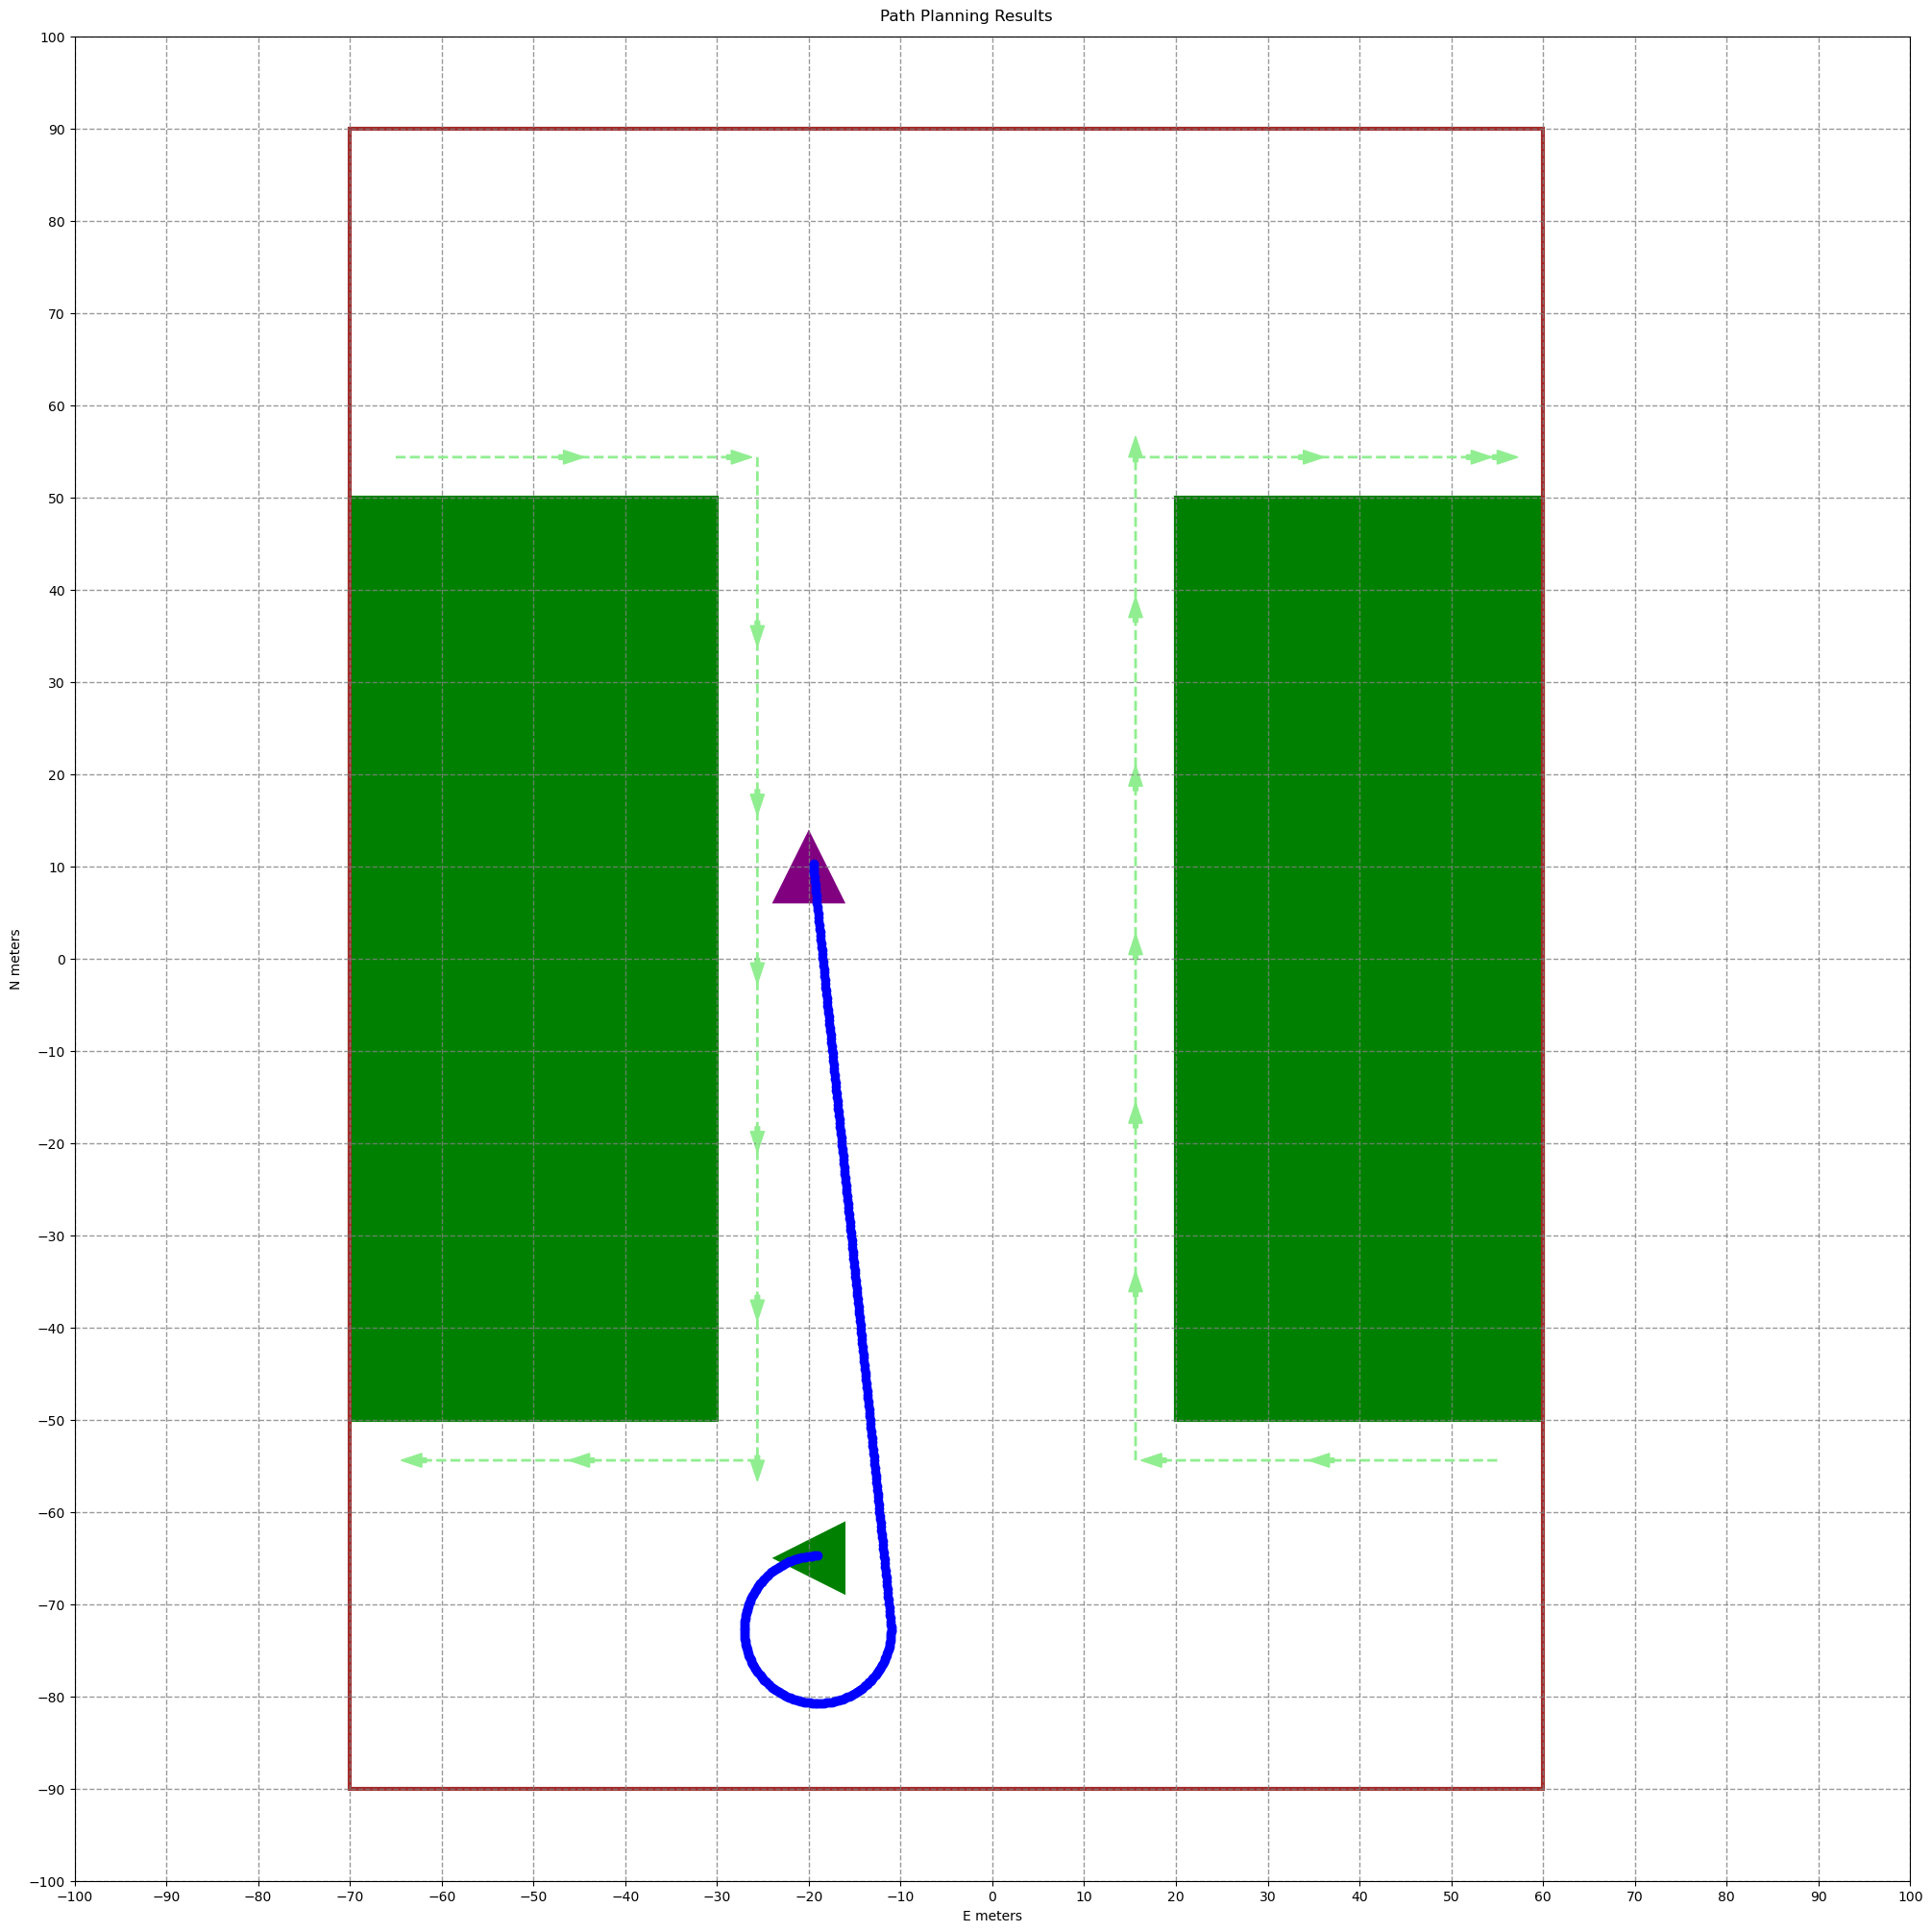

In [2]:
# Planning Scenerio 1.1
# Description: Traffic lane transition with small translation
# Case: No forward translation possible
track_spacing = 10.0
in_ground_turning_radius = 0.8 * track_spacing
vehicle_width = 0.8 * track_spacing
implement_width = 0.8 * track_spacing
work_heading = 0.0 #90.0
planning_strategy = PyPL.PlanningStrategy.ExistingTrack
''' 
Options for environment_inputs.Strategy are listed below
    SnapToBoundary, # Appears to produce results similar to "ExistingTrack"
    BestFitSnapToBoundary, # Causes the plannig library to crash
    HeadingOnly,
    ExistingTrack
'''
origin_latlon = (41.74850266356132, -93.53101140091728)
origin_easting, origin_northing, zone_number, zone_letter = utm.from_latlon(origin_latlon[0], origin_latlon[1])
origin_xy = np.asarray([origin_easting, origin_northing])

obstacles_plot_attributes = {'edgecolor':'green',
                               'linewidth': 3,
                               'facecolor': 'green'}
obstacles = [Box2D.create_box(origin_xy + np.asarray([-5.0 * track_spacing, 0]),  4.0 * track_spacing, 10.0* track_spacing,
                              **obstacles_plot_attributes),
            Box2D.create_box(origin_xy + np.asarray([4.0 * track_spacing, 0]),  4.0 * track_spacing, 10.0* track_spacing,
                            **obstacles_plot_attributes)]

padding = [0.0, 40.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)
print('zone number: {}, zone_letter: {}'.format(zone_number, zone_letter))    

# Path inputs
start_xy = obstacles[0].bottom_right + np.asarray([1.0 * track_spacing, -1.5 * track_spacing])
end_xy = obstacles[0].top_right + np.asarray([1.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 180.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 90.0, zone_number, zone_letter)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))


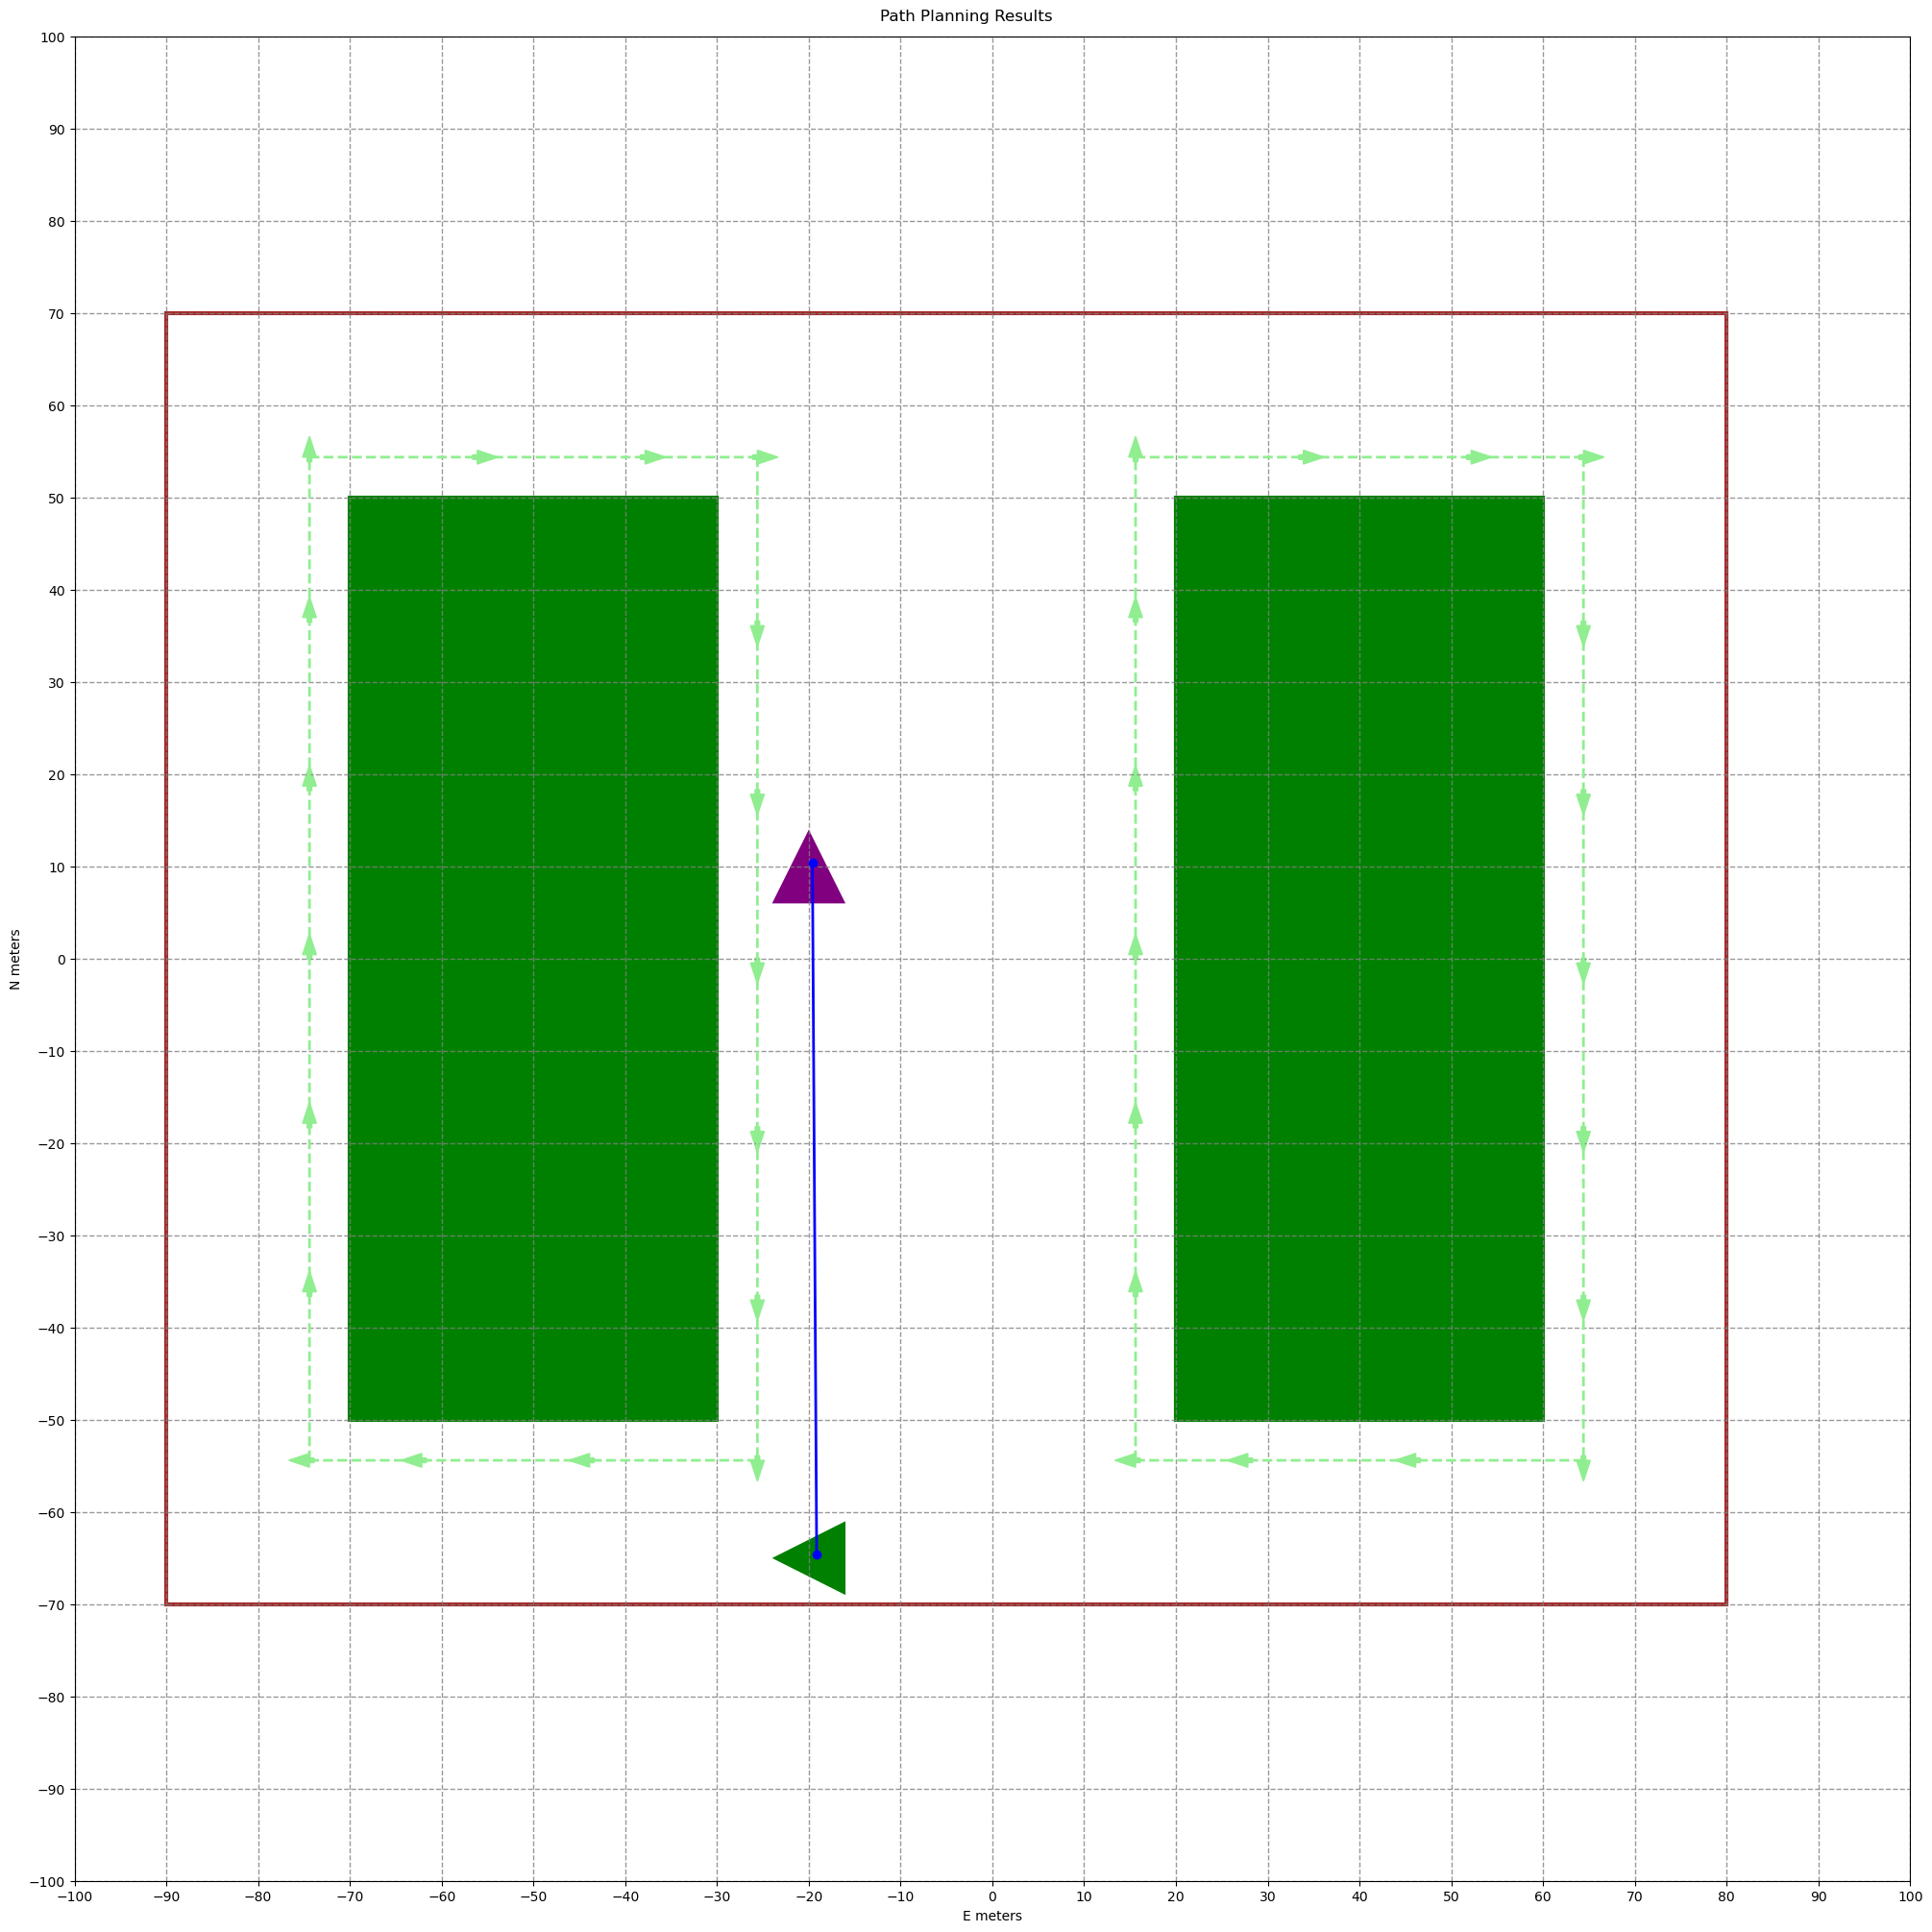

In [3]:
# Planning Scenerio 1.2
# Description: Traffic lane transition with small translation, 
# Case: No forward translation possible, horizontal boundaries opened and vertical boundaries tightened

padding = [20.0, 20.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))

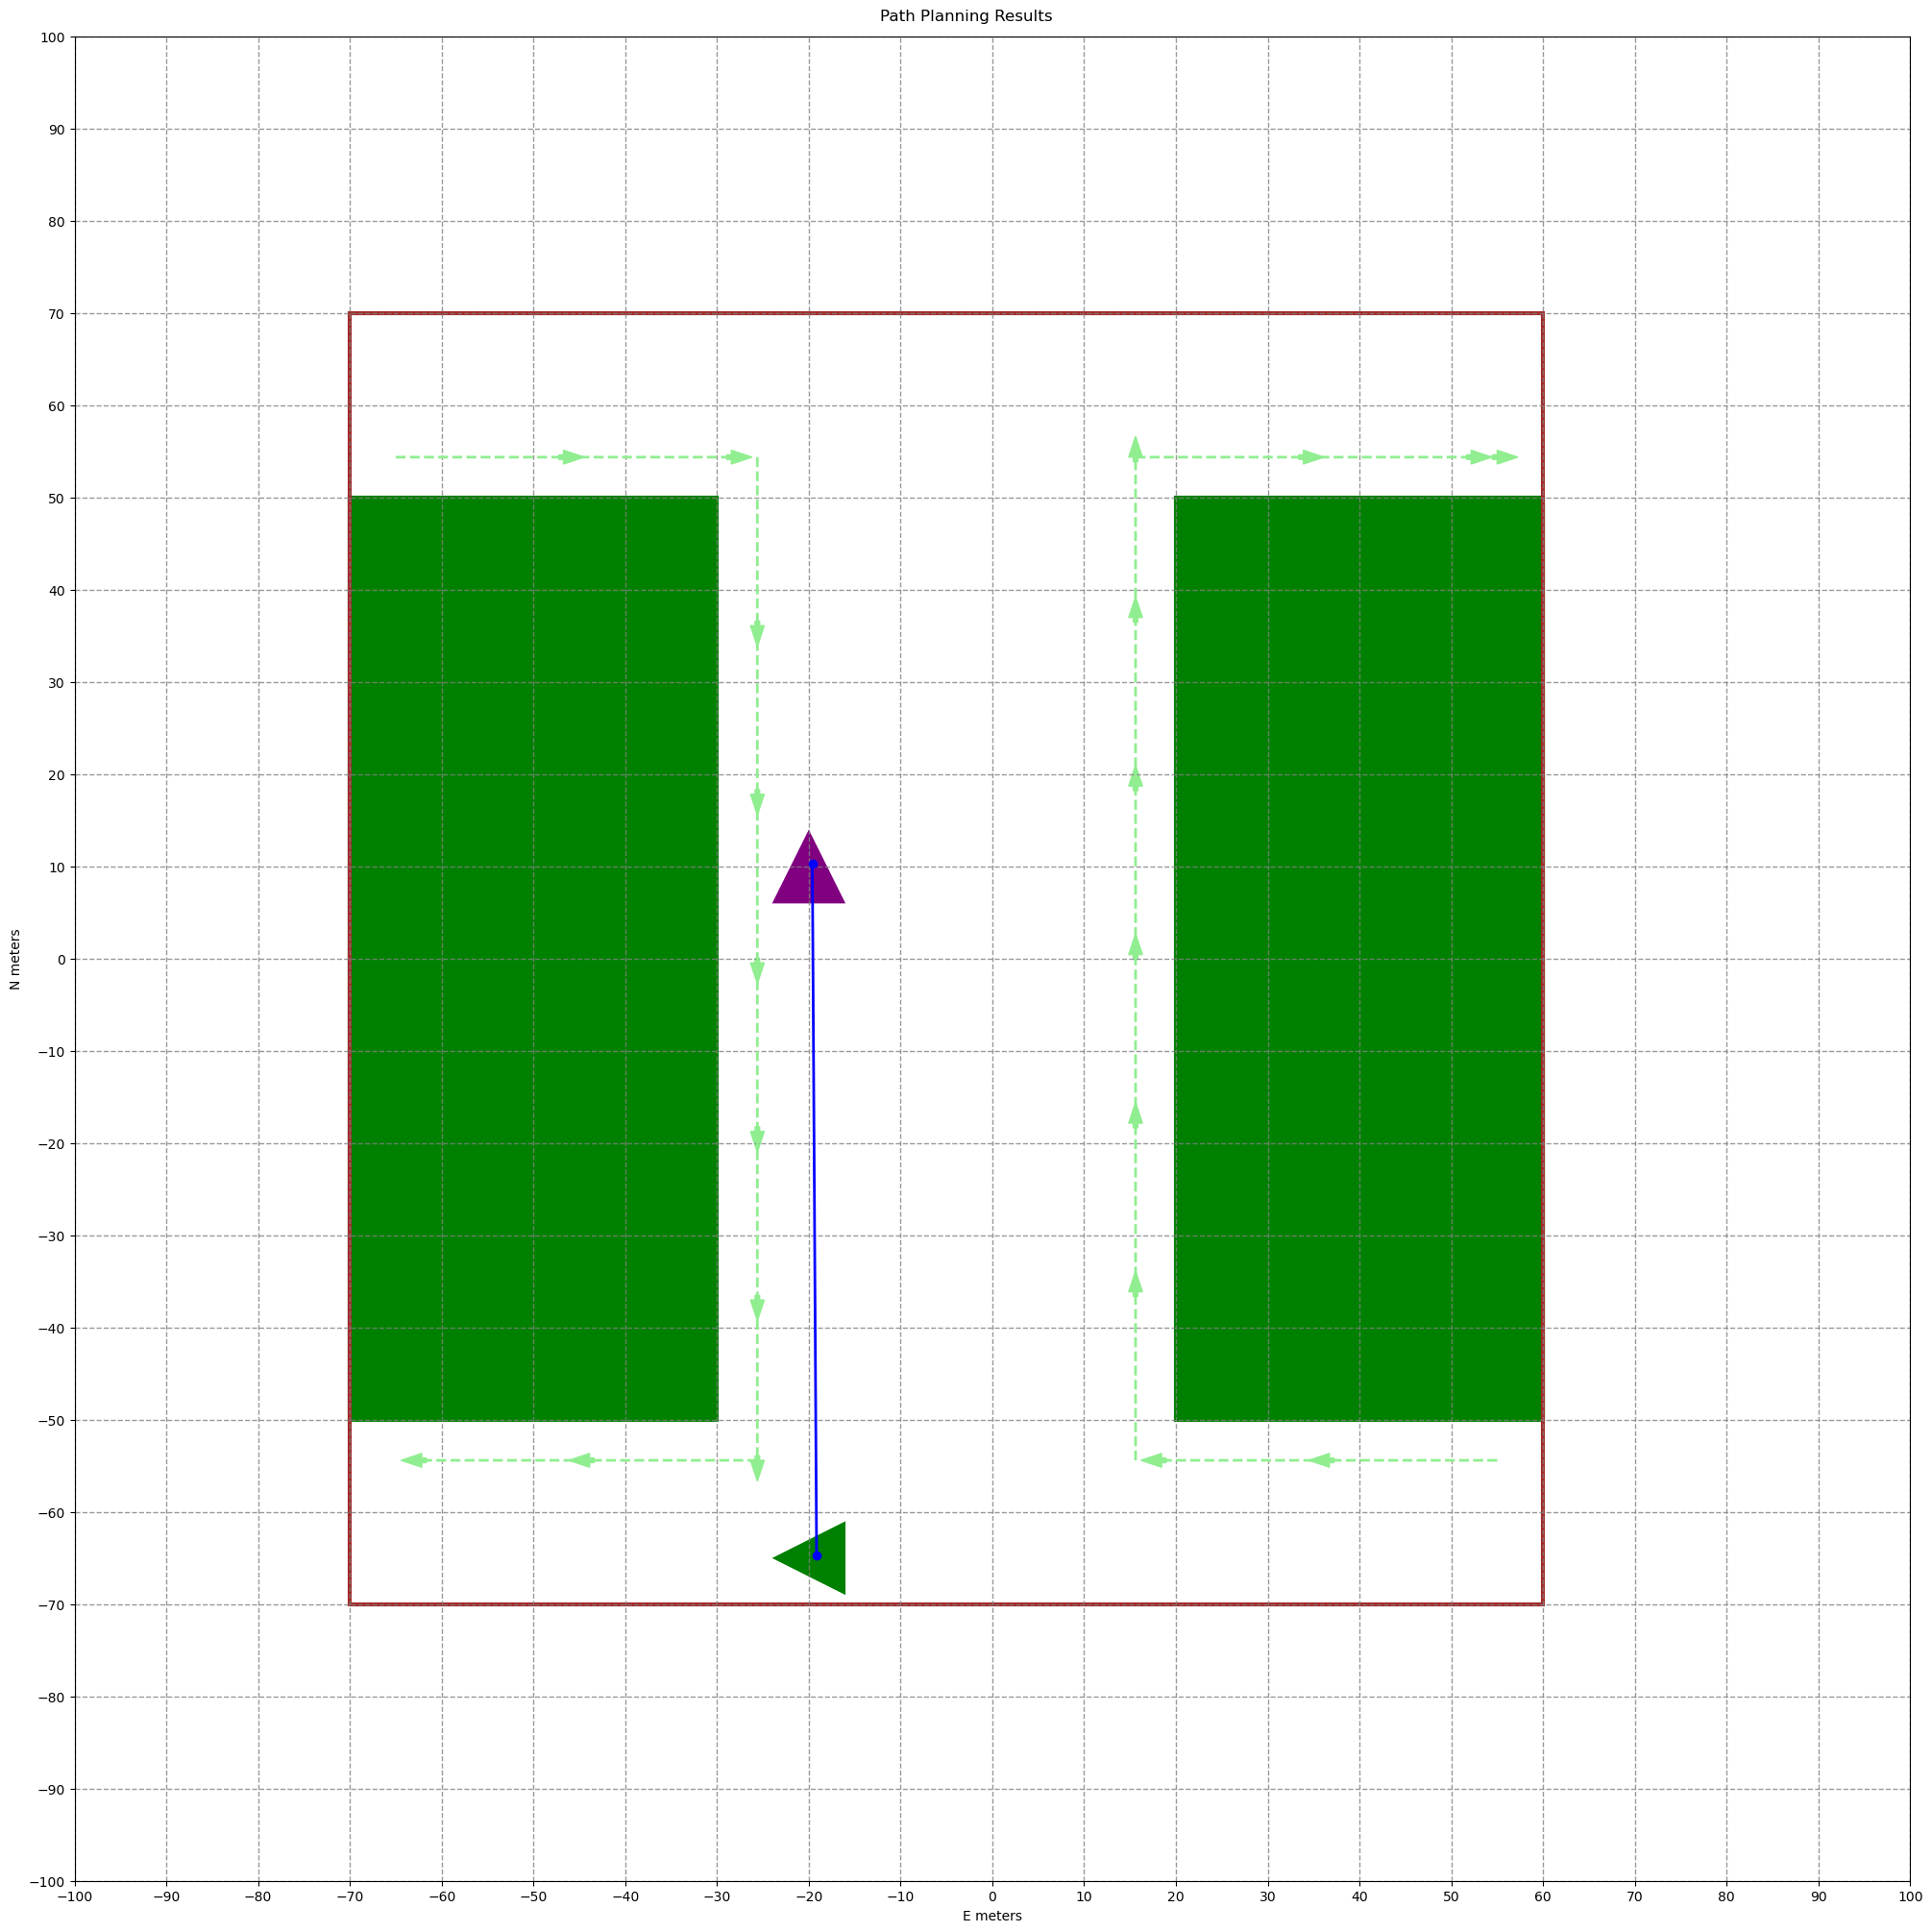

In [4]:
# Planning Scenerio 1.3
# Description: Traffic lane transition with small translation, 
# Case: No forward translation possible, horizontal boundaries closed and vertical boundaries tightened
padding = [0.0, 20.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))

local start: [-18. -65.]
local end: [-20.  10.]


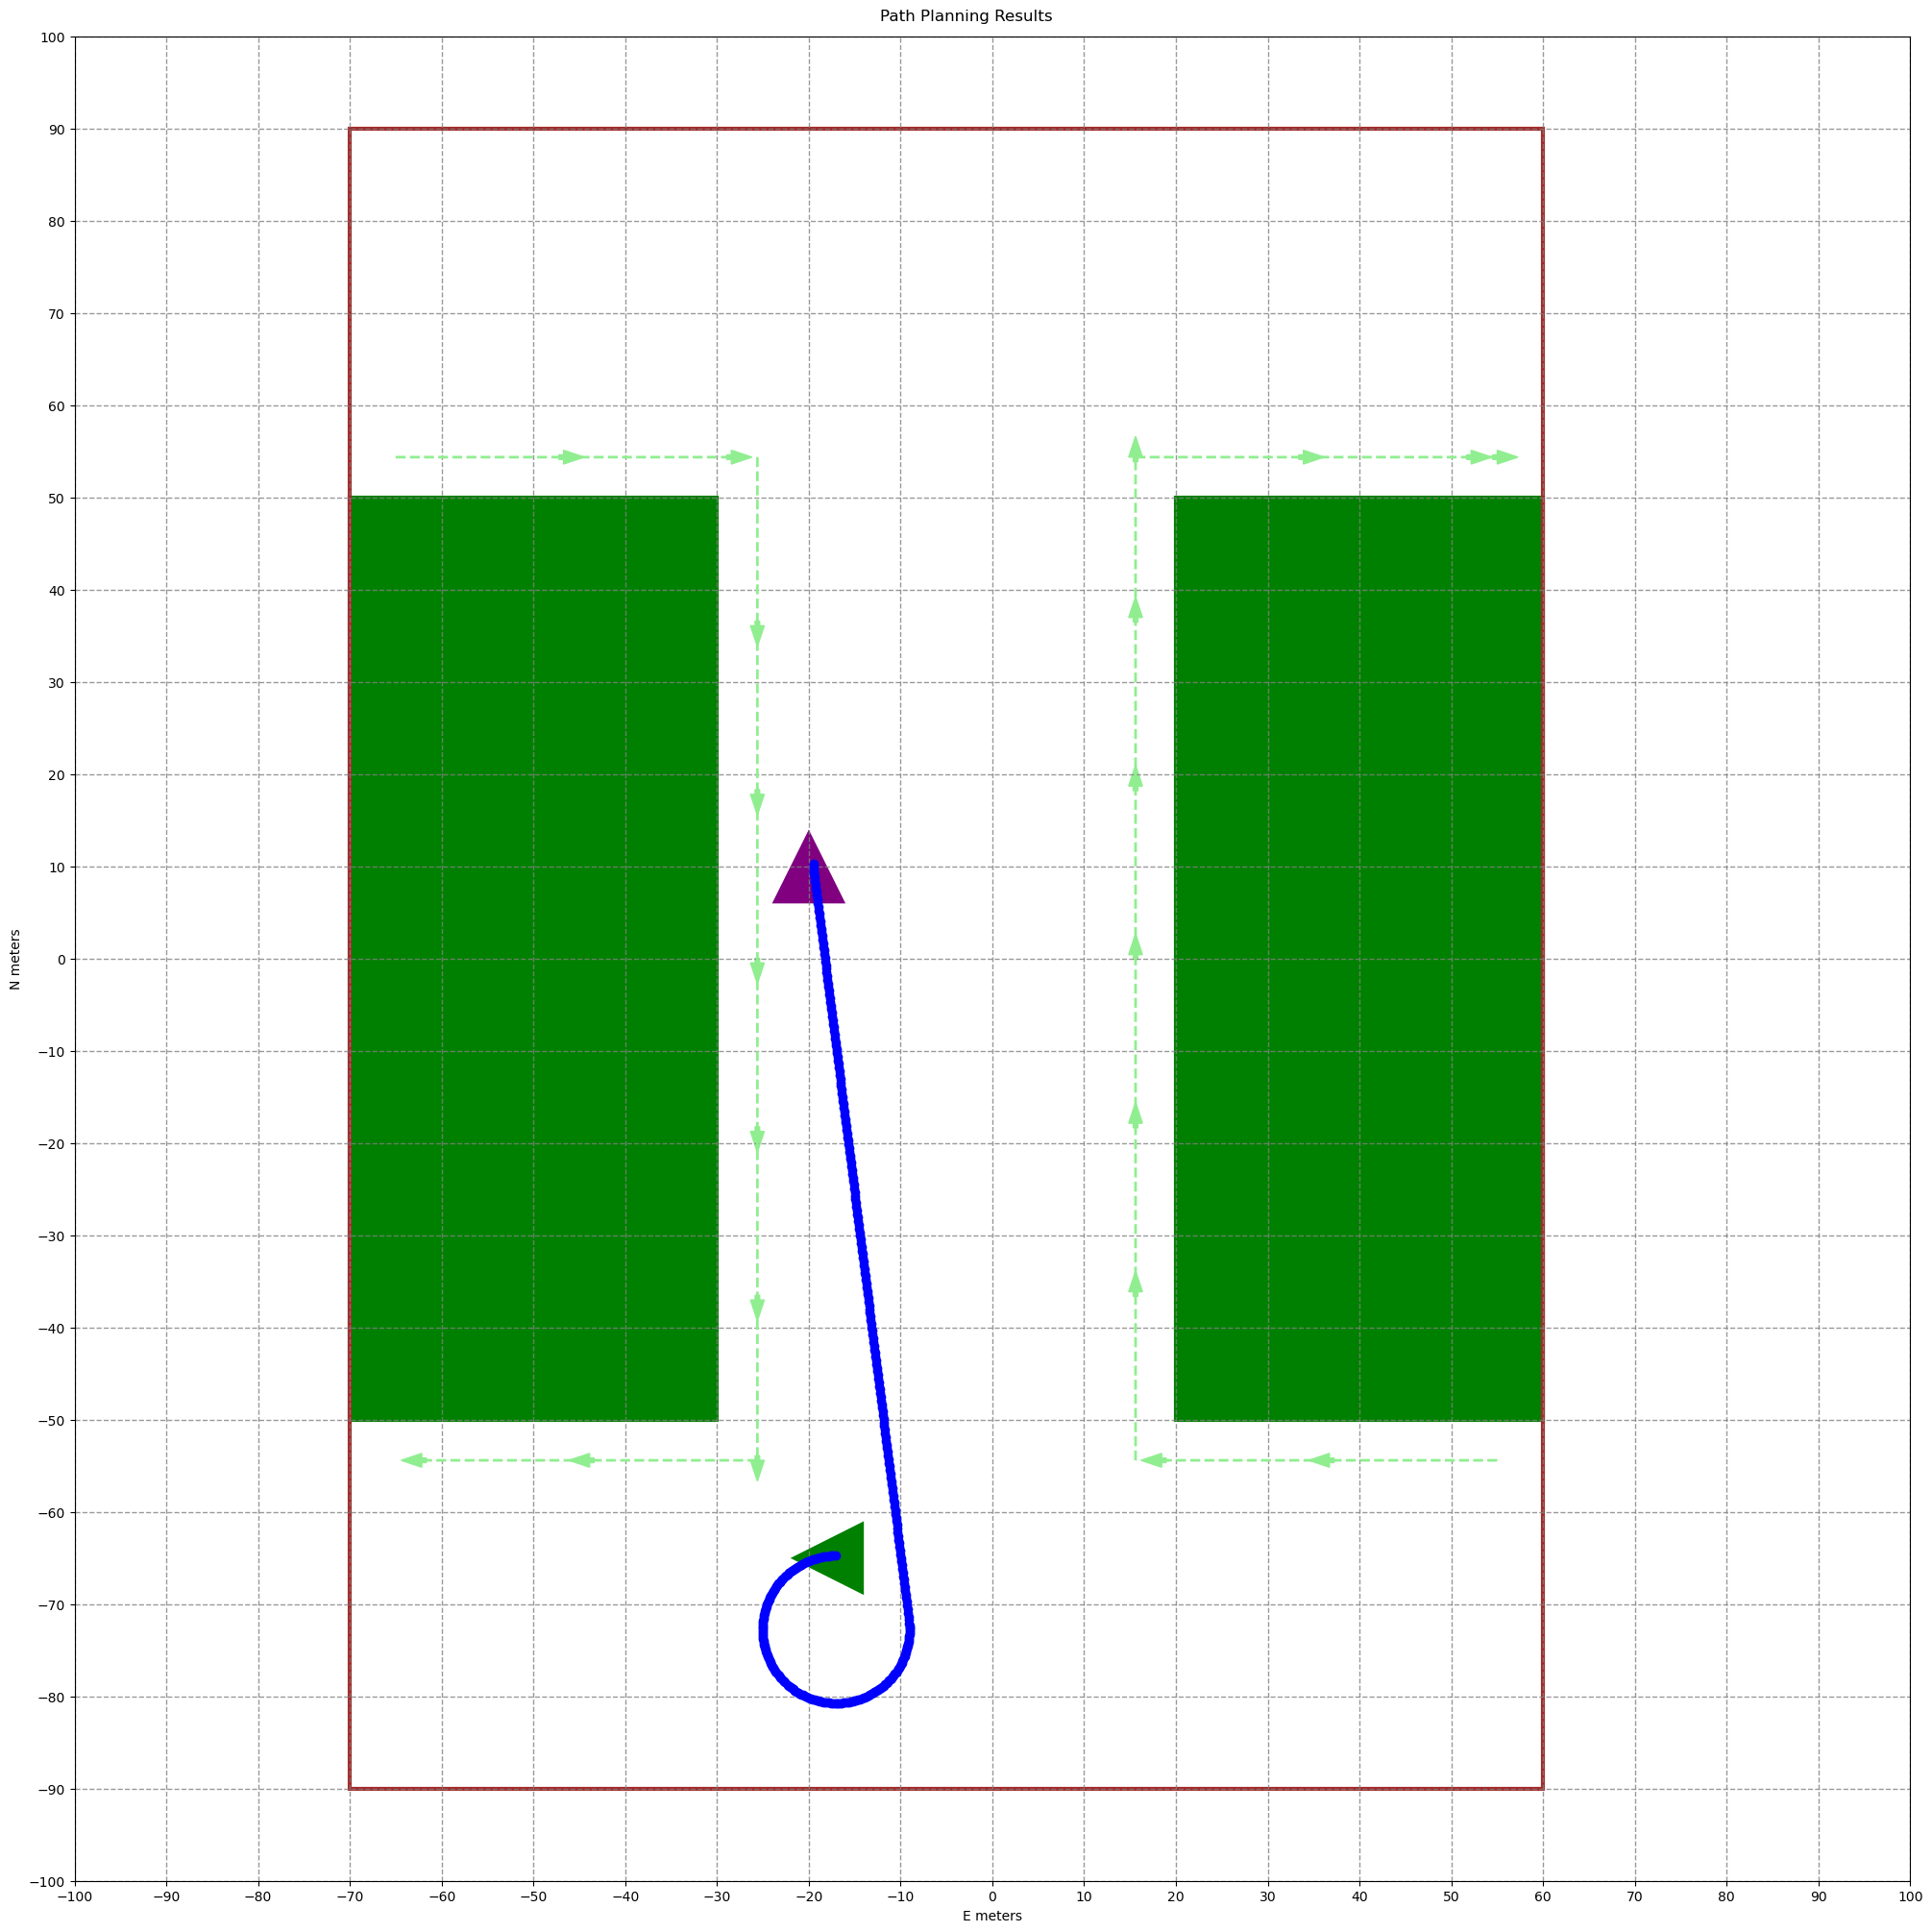

In [5]:
# Planning Scenerio 1.4
# Description: Traffic lane transition with small translation
# Case: Little forward translation possible
padding = [0.0, 40.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)

# Path inputs
start_xy = obstacles[0].bottom_right + np.asarray([1.2 * track_spacing, -1.5 * track_spacing])
end_xy = obstacles[0].top_right + np.asarray([1.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 180.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 90.0, zone_number, zone_letter)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))

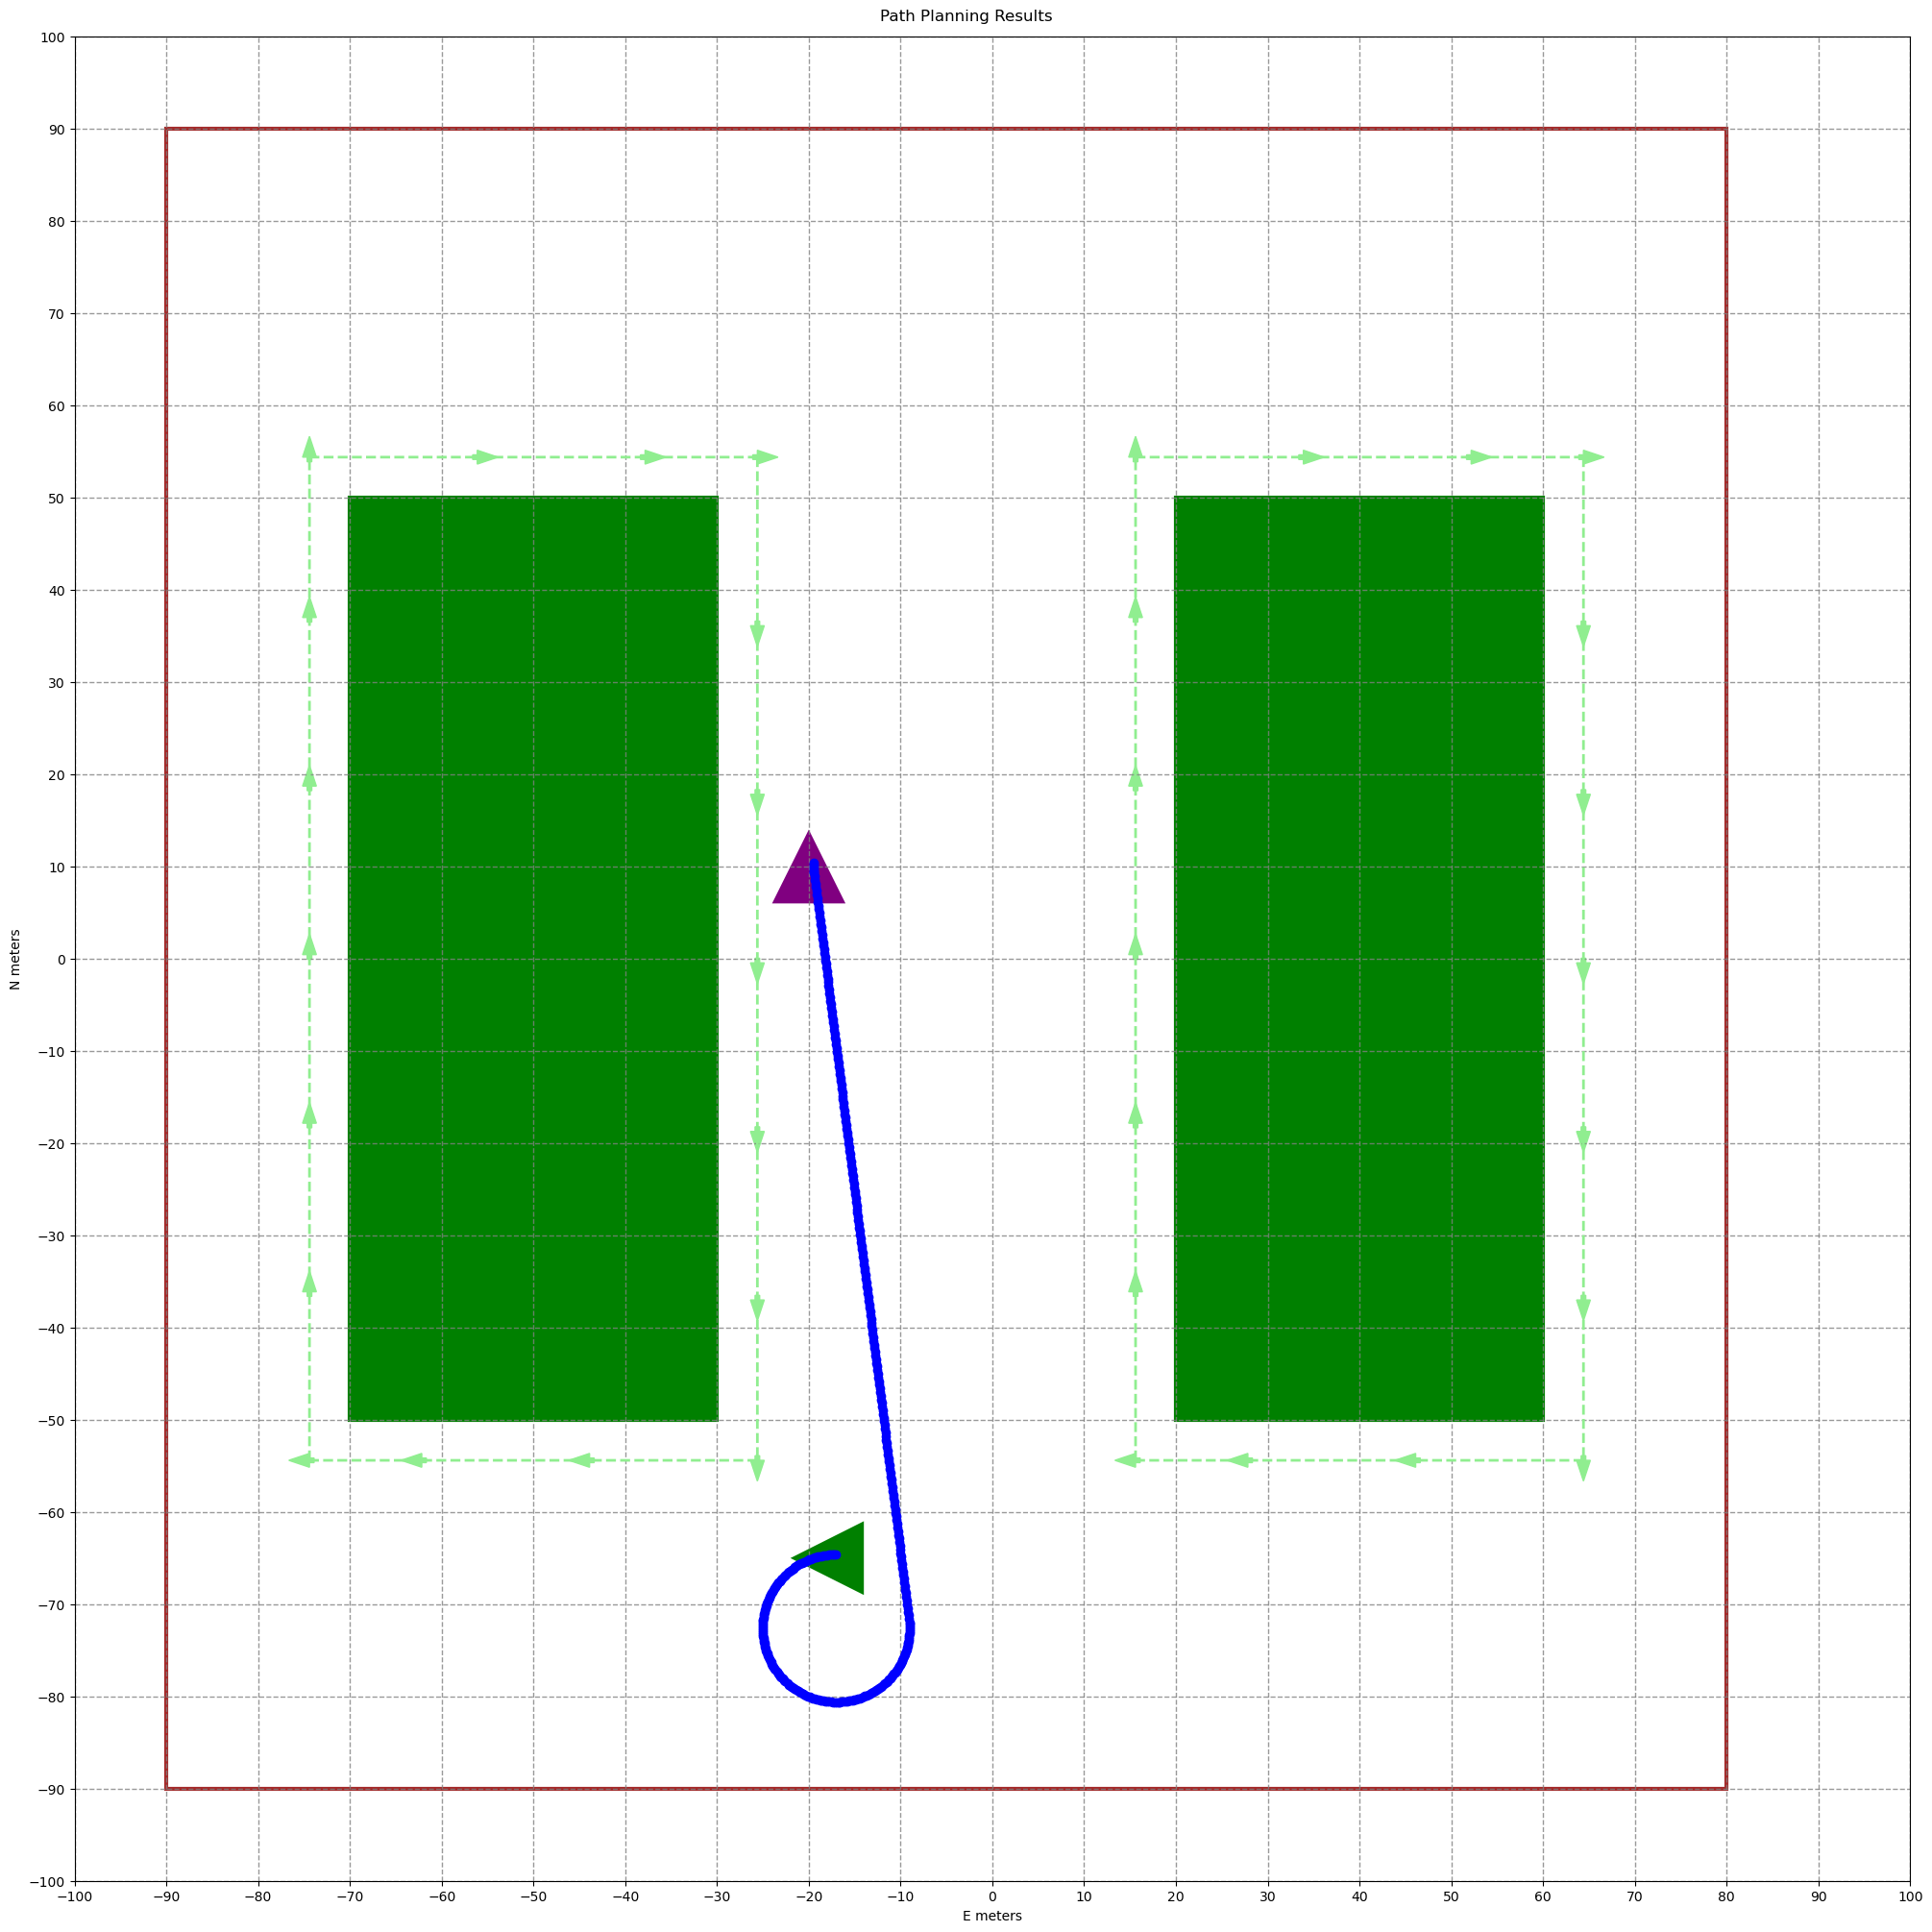

In [6]:
# Planning Scenerio 1.5
# Description: Traffic lane transition with small translation
# Case: Little forward translation possible with expanded boundaries
padding = [20.0, 40.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)

plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))

local start: [-28. -65.]
local end: [-20.  10.]


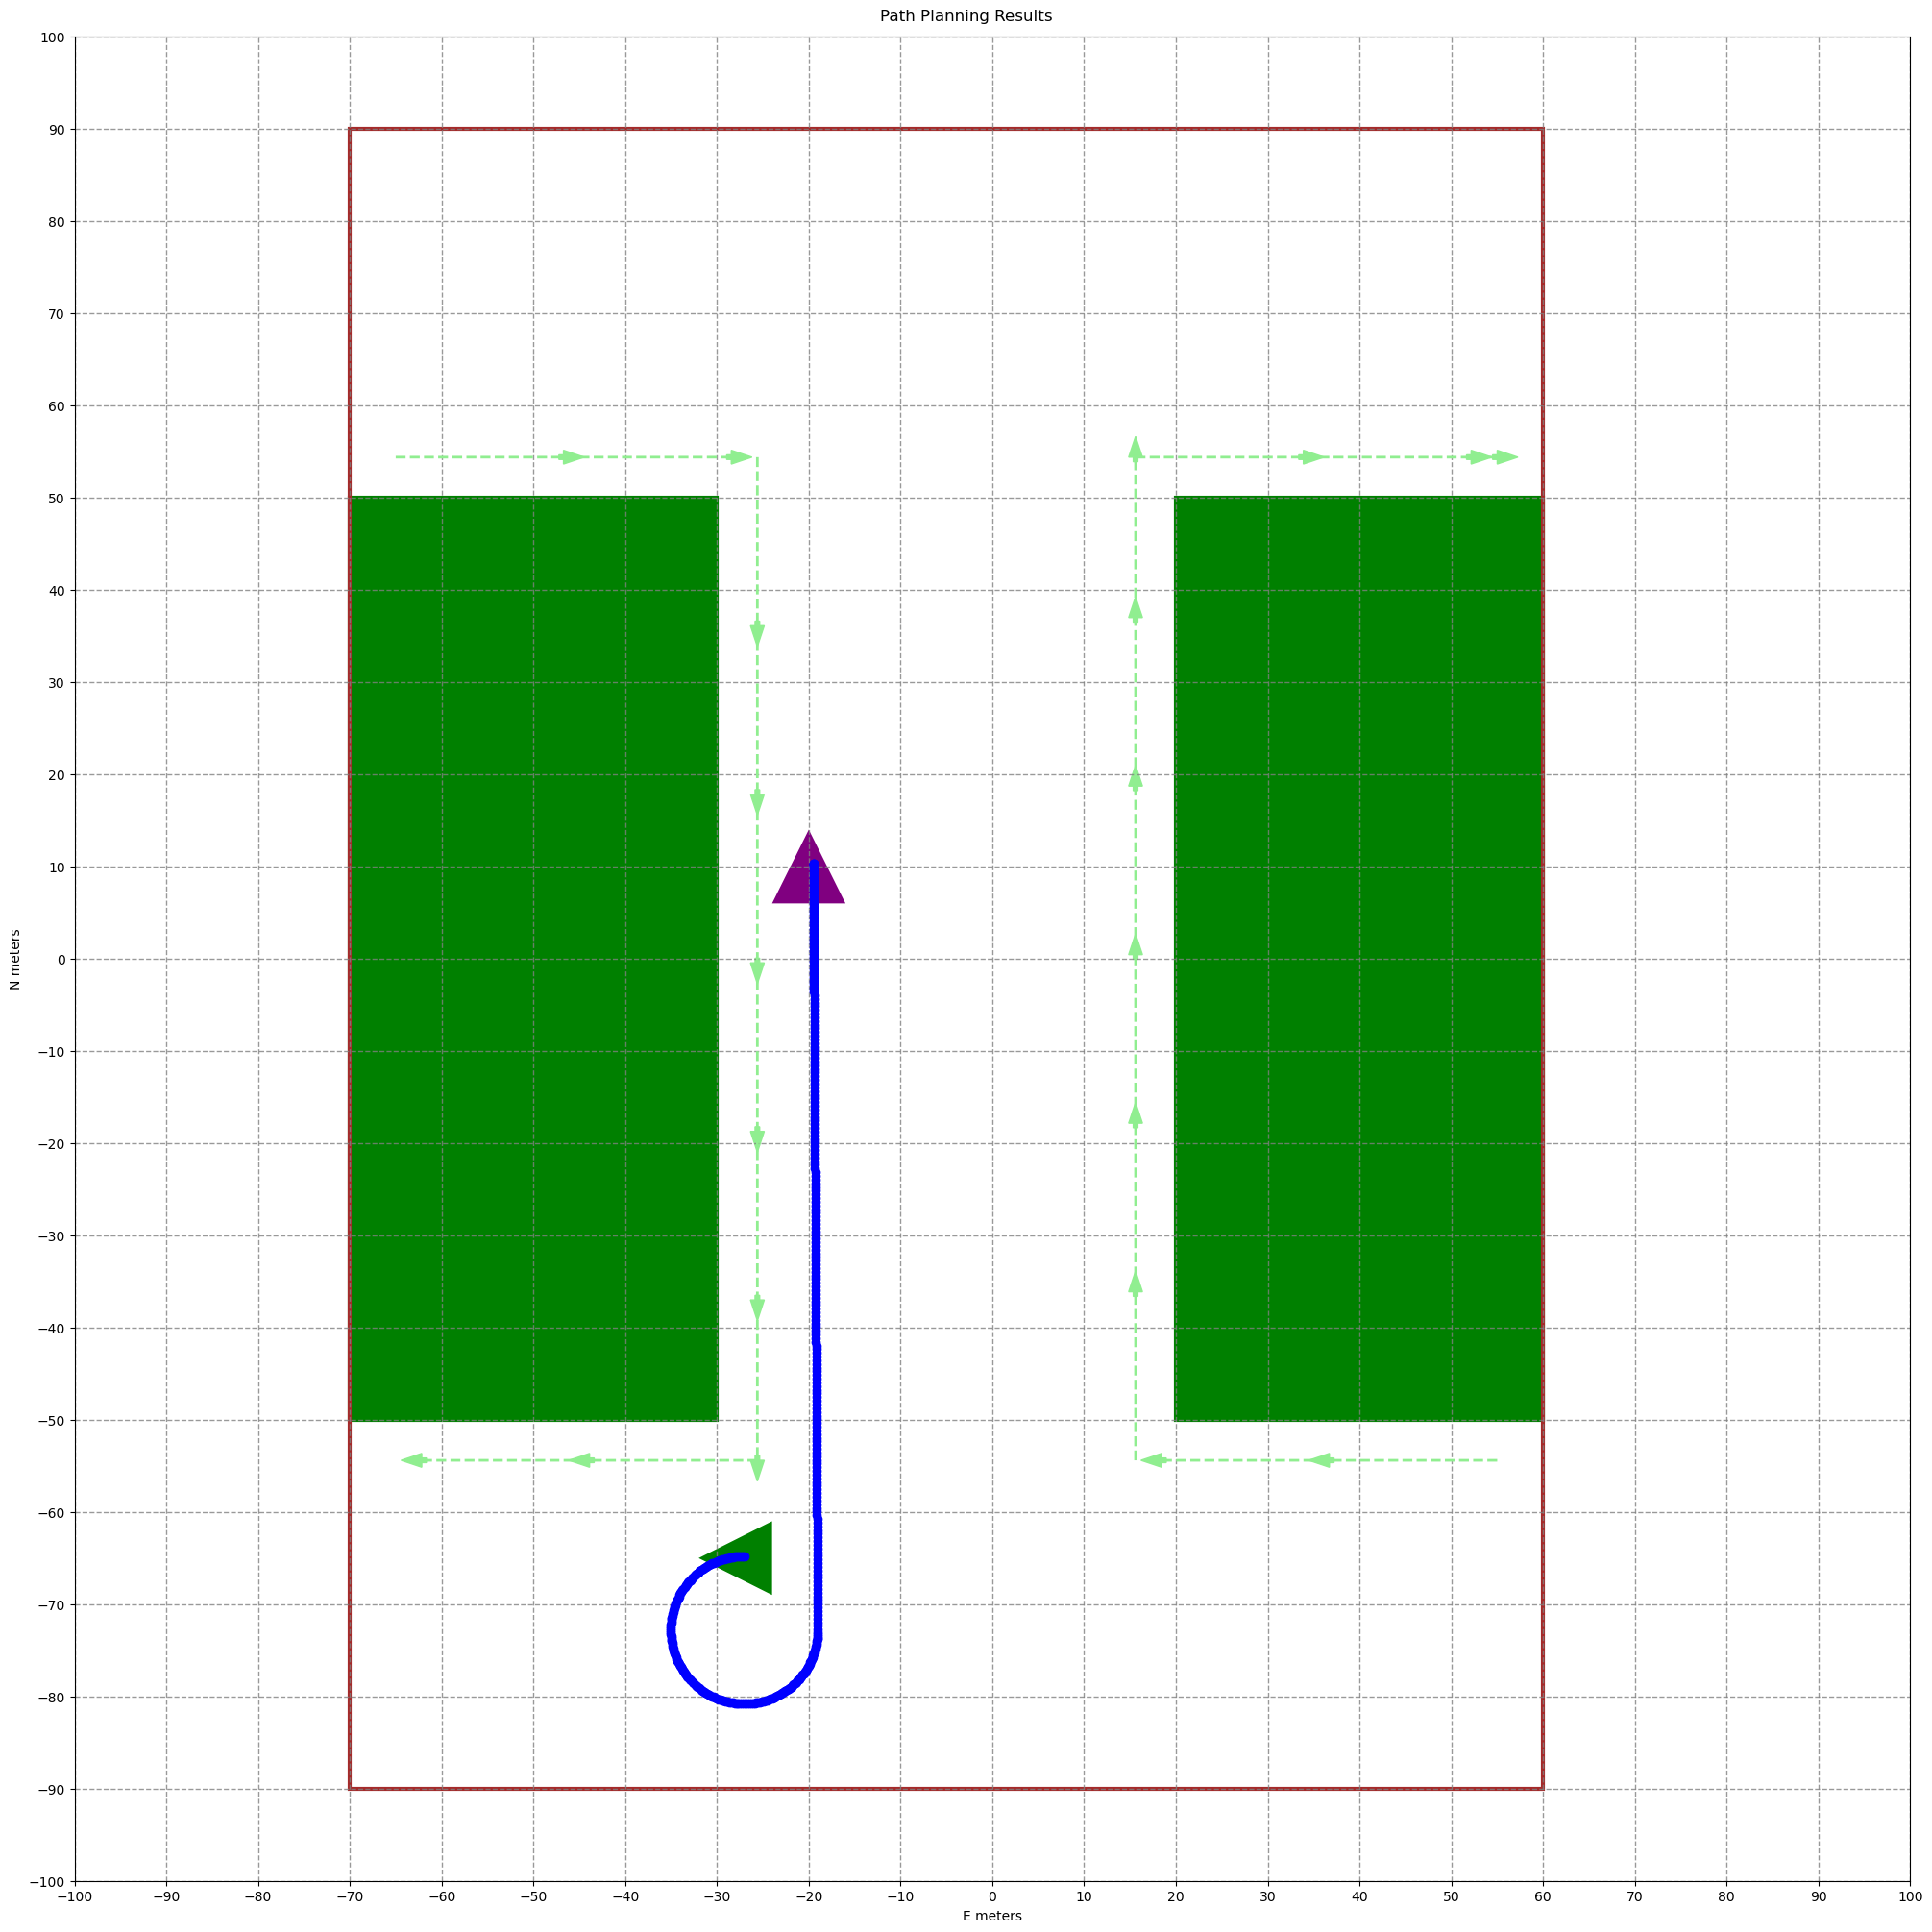

In [7]:
# Planning Scenerio 1.6
# Description: Traffic lane transition with small translation
# Case: Negative translation 
padding = [0.0, 40.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)

# Path inputs
start_xy = obstacles[0].bottom_right + np.asarray([0.2 * track_spacing, -1.5 * track_spacing])
end_xy = obstacles[0].top_right + np.asarray([1.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 180.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 90.0, zone_number, zone_letter)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))

local start: [-28. -65.]
local end: [-20.  10.]


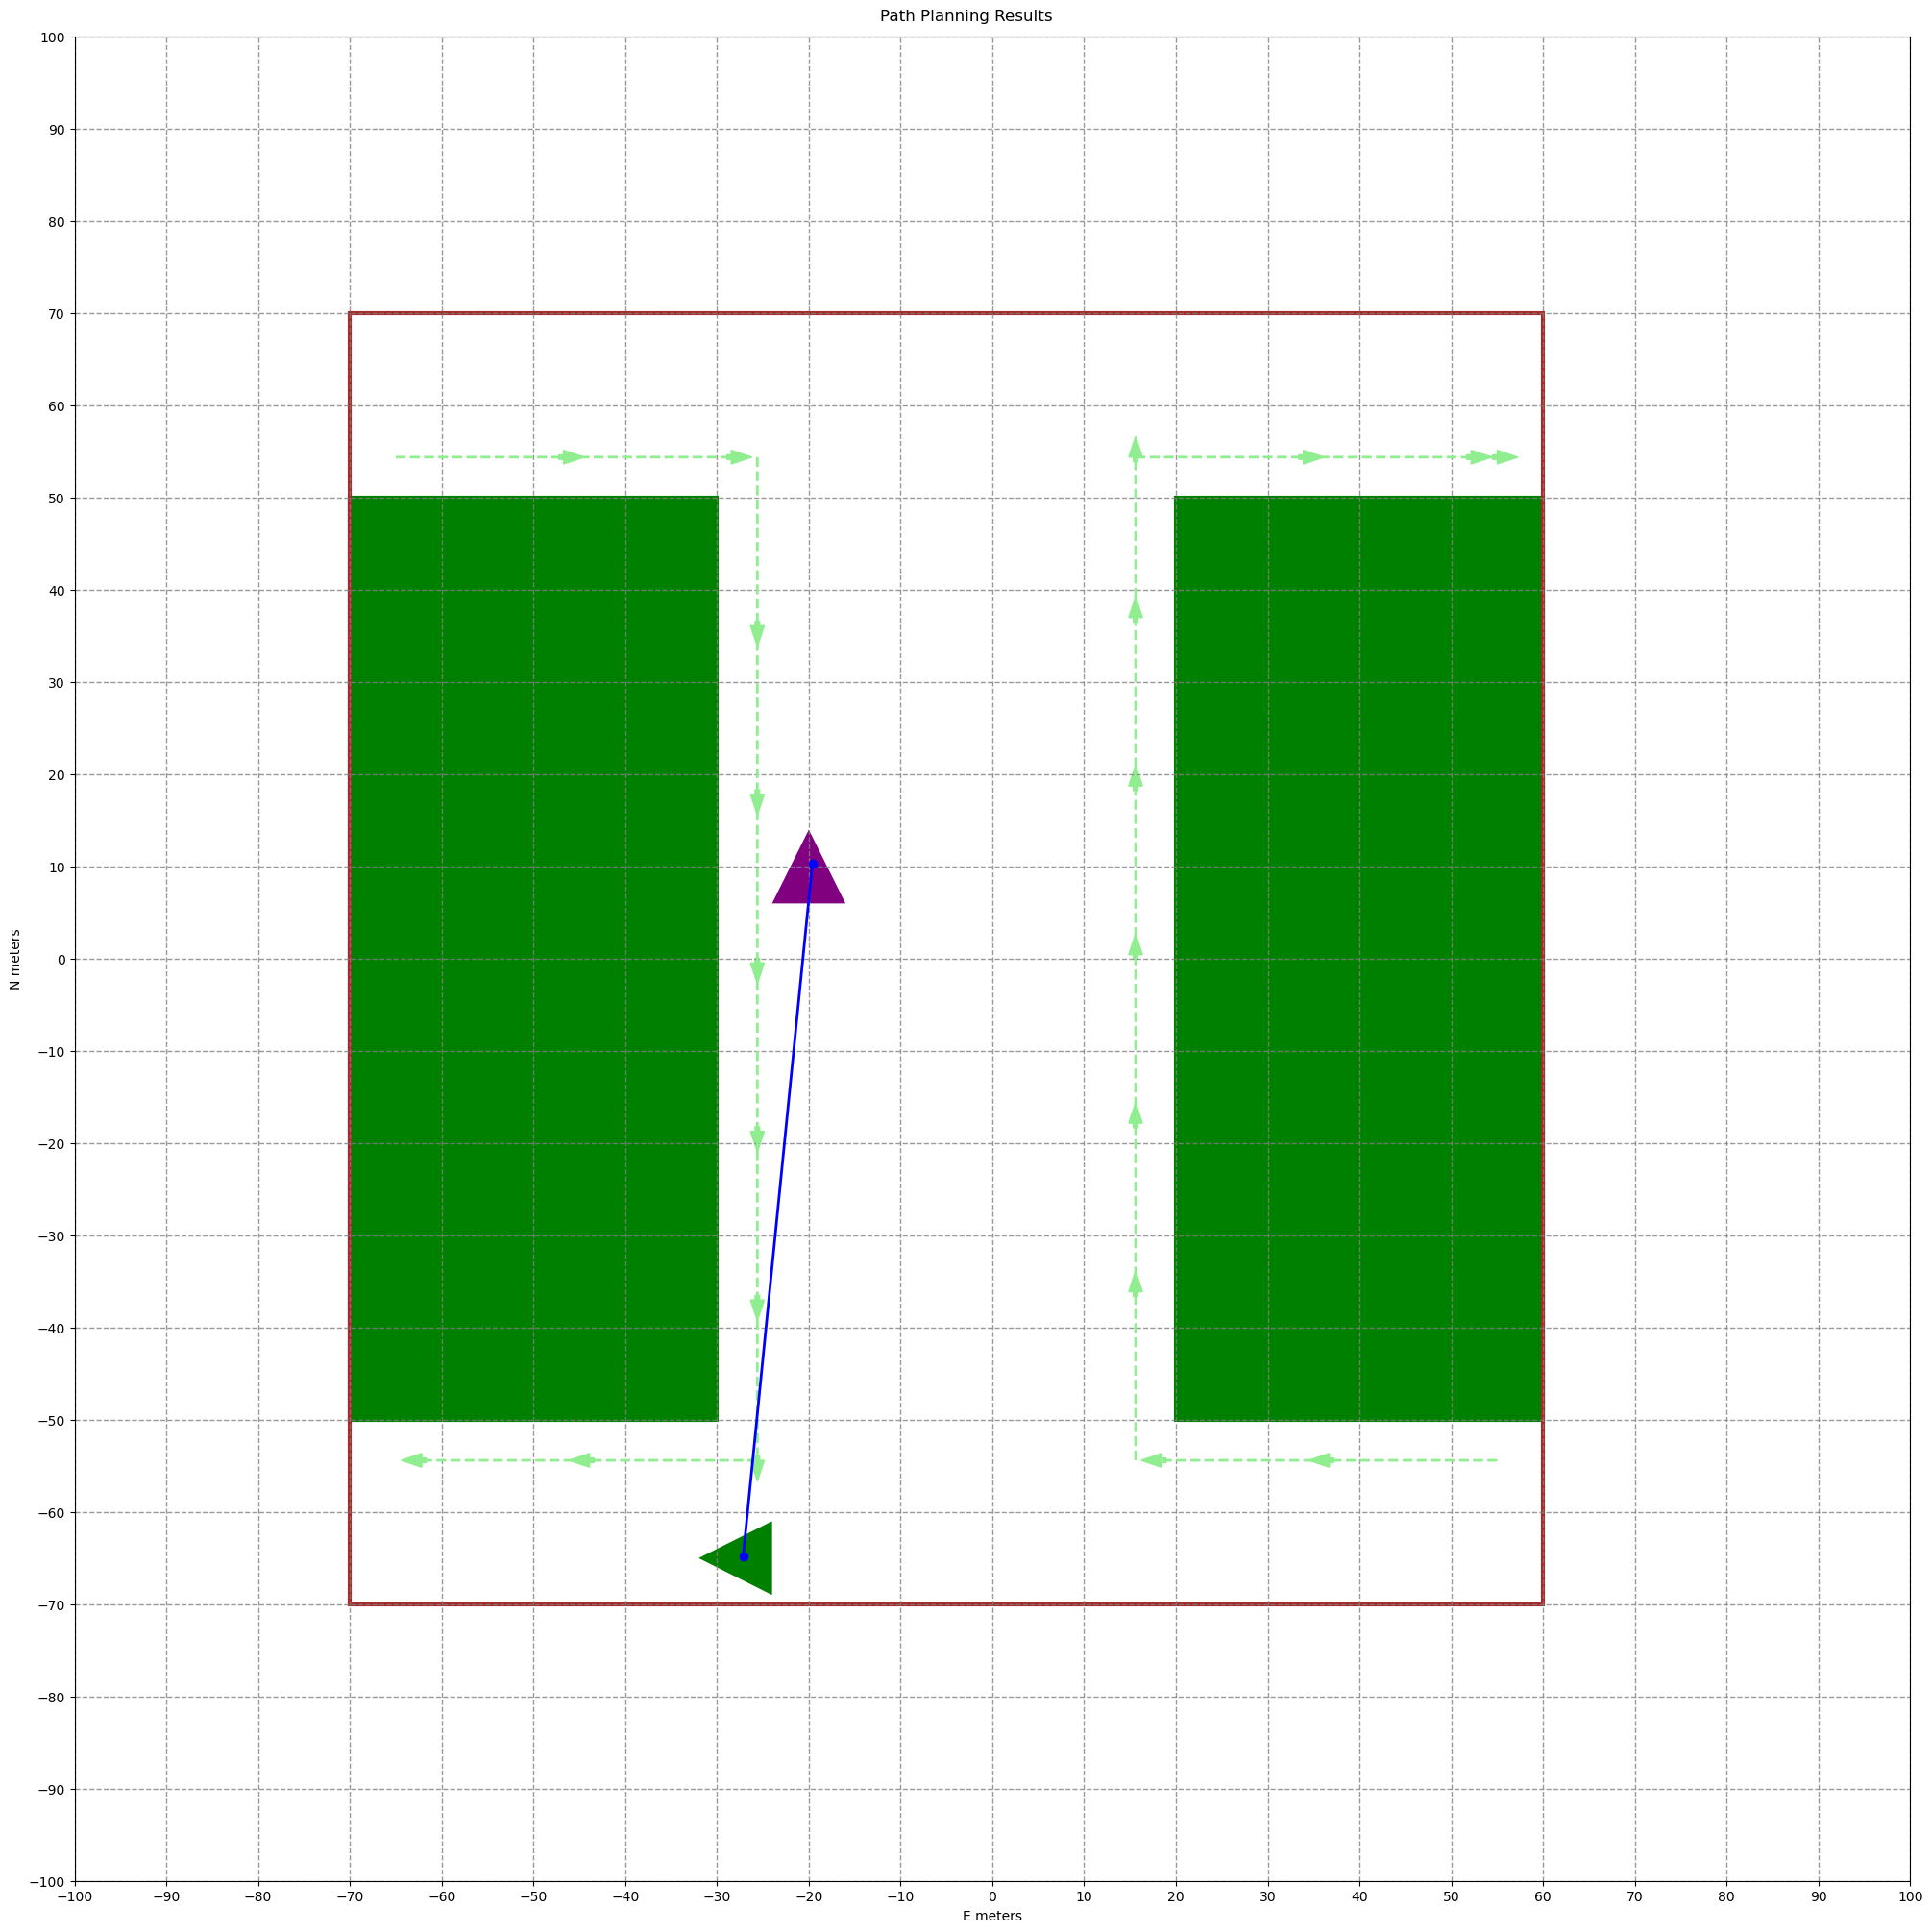

In [8]:
# Planning Scenerio 1.7
# Description: Traffic lane transition with small translation
# Case: Negative translation with tightened boundaries
padding = [0.0, 20.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)

# Path inputs
start_xy = obstacles[0].bottom_right + np.asarray([0.2 * track_spacing, -1.5 * track_spacing])
end_xy = obstacles[0].top_right + np.asarray([1.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 180.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 90.0, zone_number, zone_letter)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))

local start: [-22. -65.]
local end: [-20.  10.]


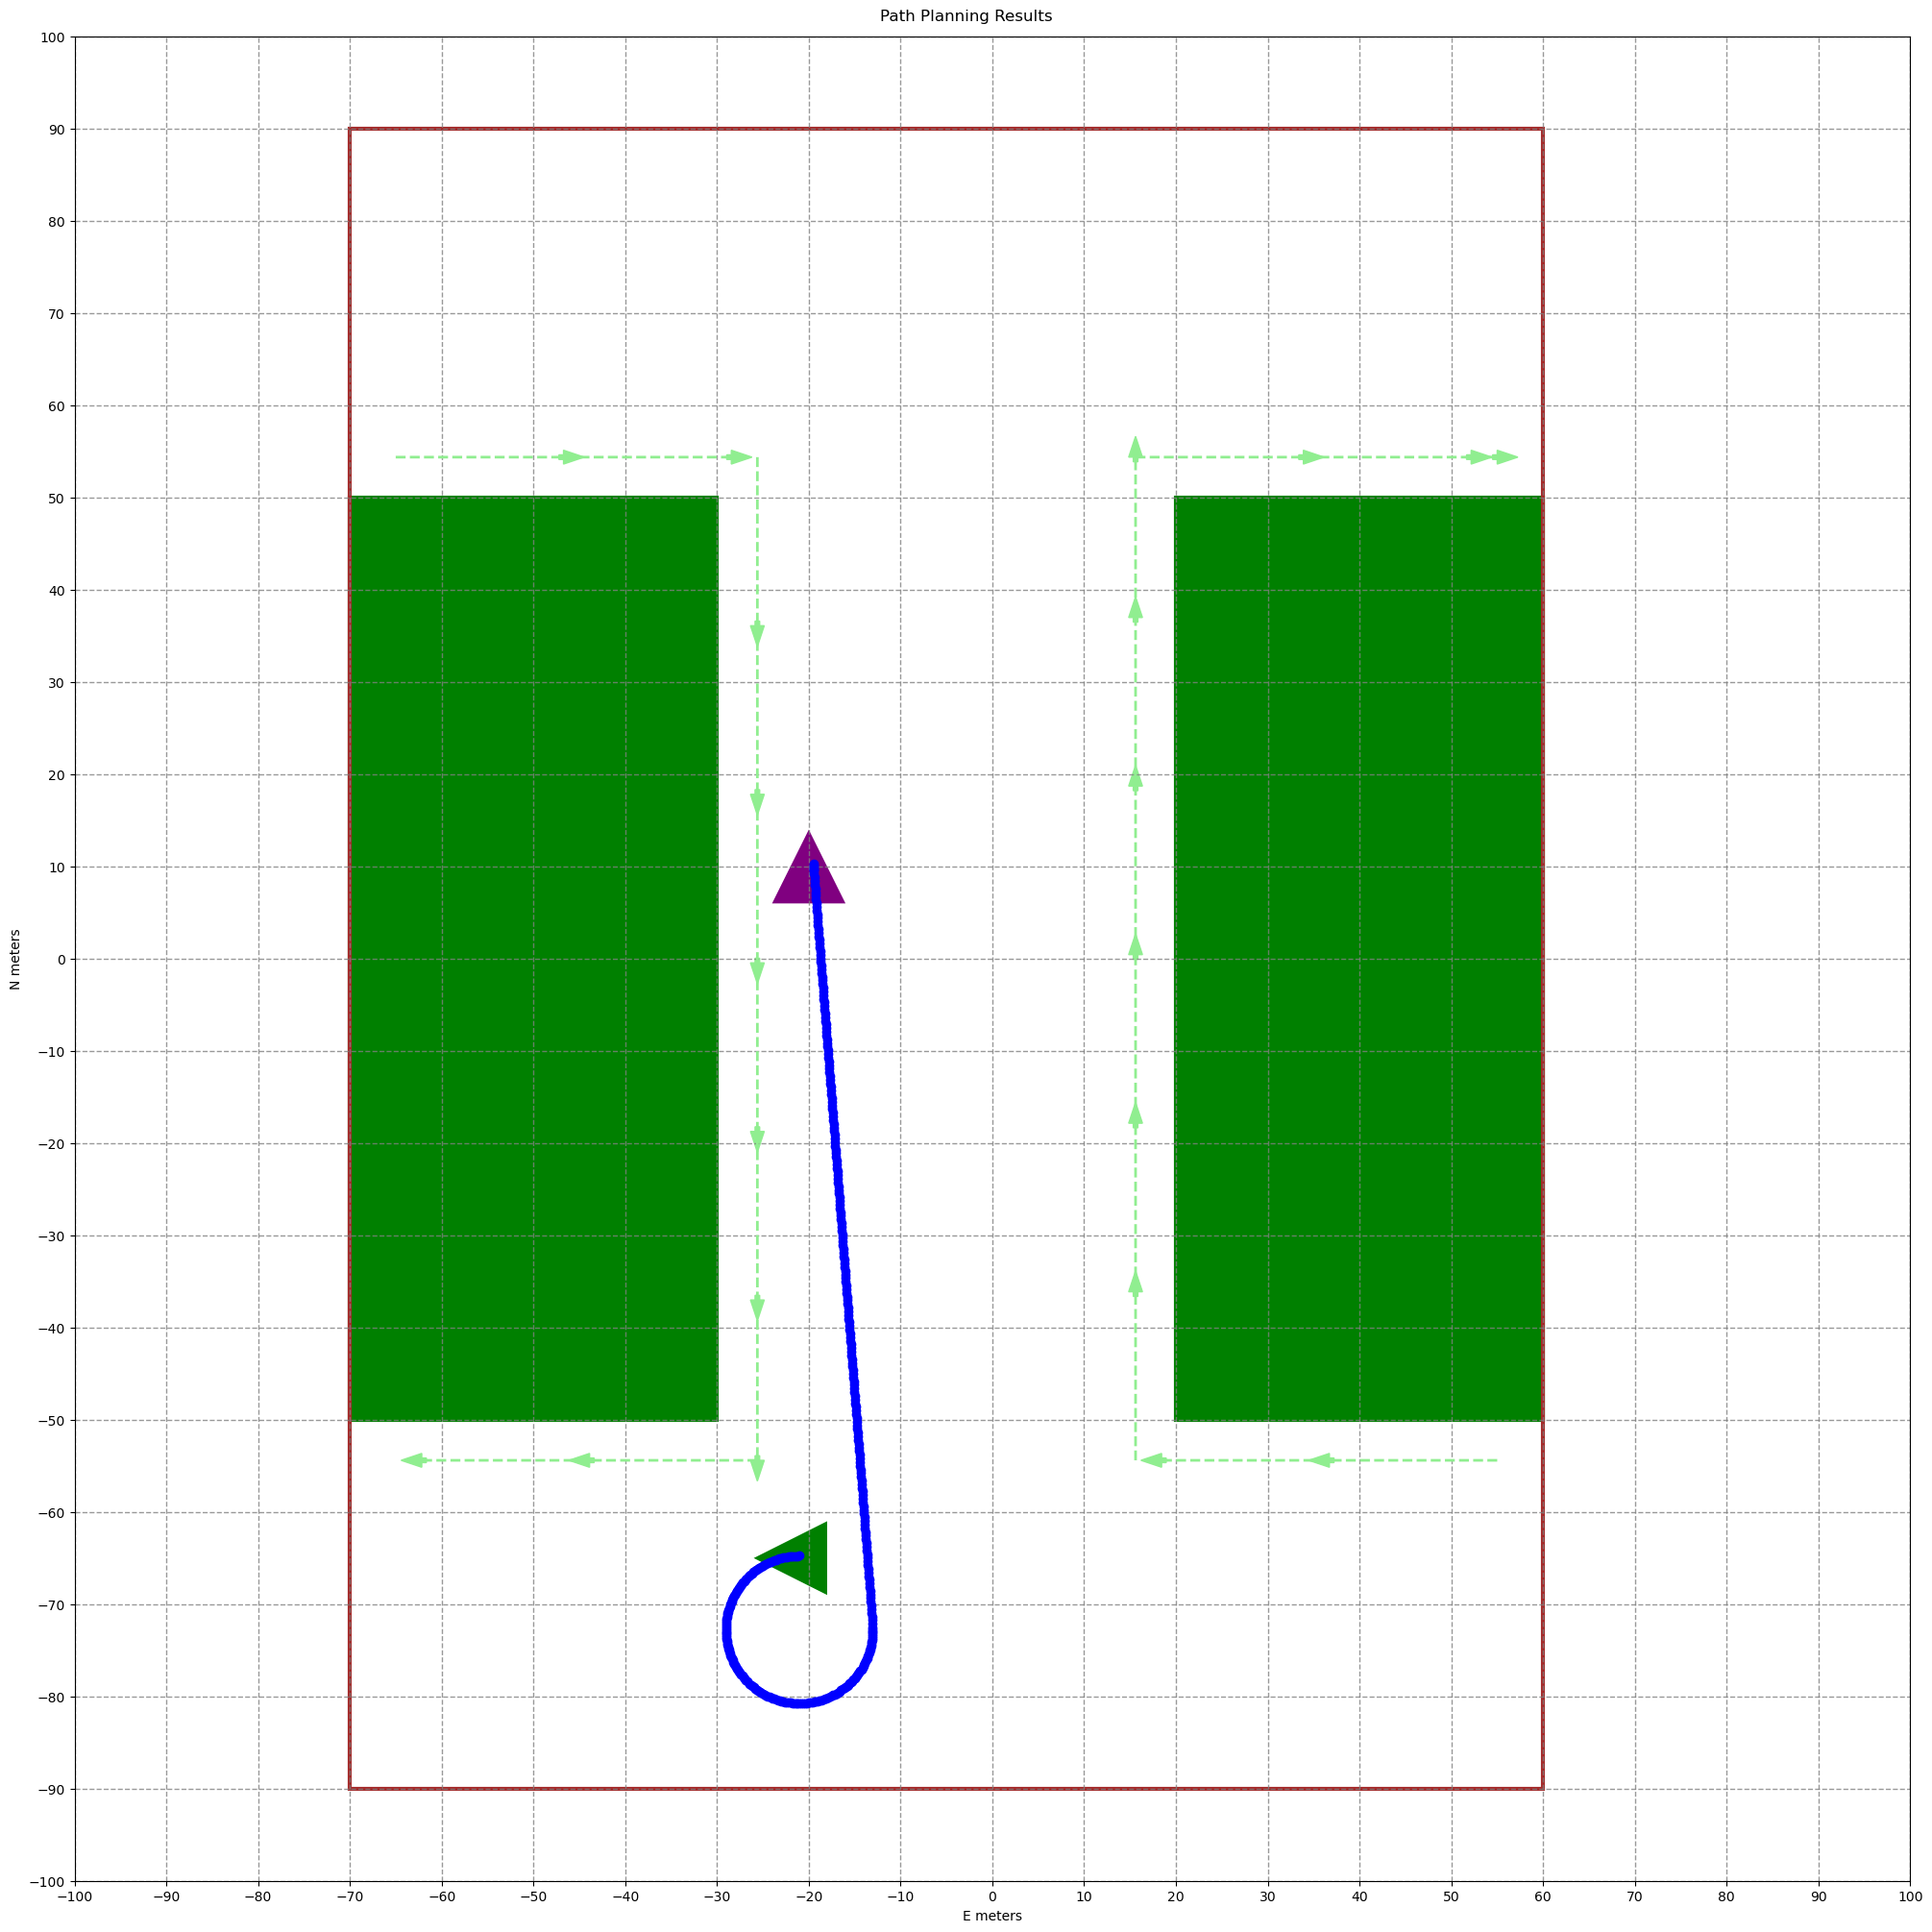

In [9]:
# Planning Scenerio 1.8
# Description: Traffic lane transition with extremely small translation necessary
# Case: Very small negative translation necessary
padding = [0.0, 40.0]
boundaries = [Box2D.compute_bounding_box(obstacles, padding)]
environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy)

# Path inputs
start_xy = obstacles[0].bottom_right + np.asarray([0.8 * track_spacing, -1.5 * track_spacing])
end_xy = obstacles[0].top_right + np.asarray([1.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 180.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 90.0, zone_number, zone_letter)
plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints, plan_results, output_path_offset, np.arange(-100, 101, track_spacing))